(164878, 6) Index(['device_id', 'date', 'metric', 'id', 'color', 'marker'], dtype='object')


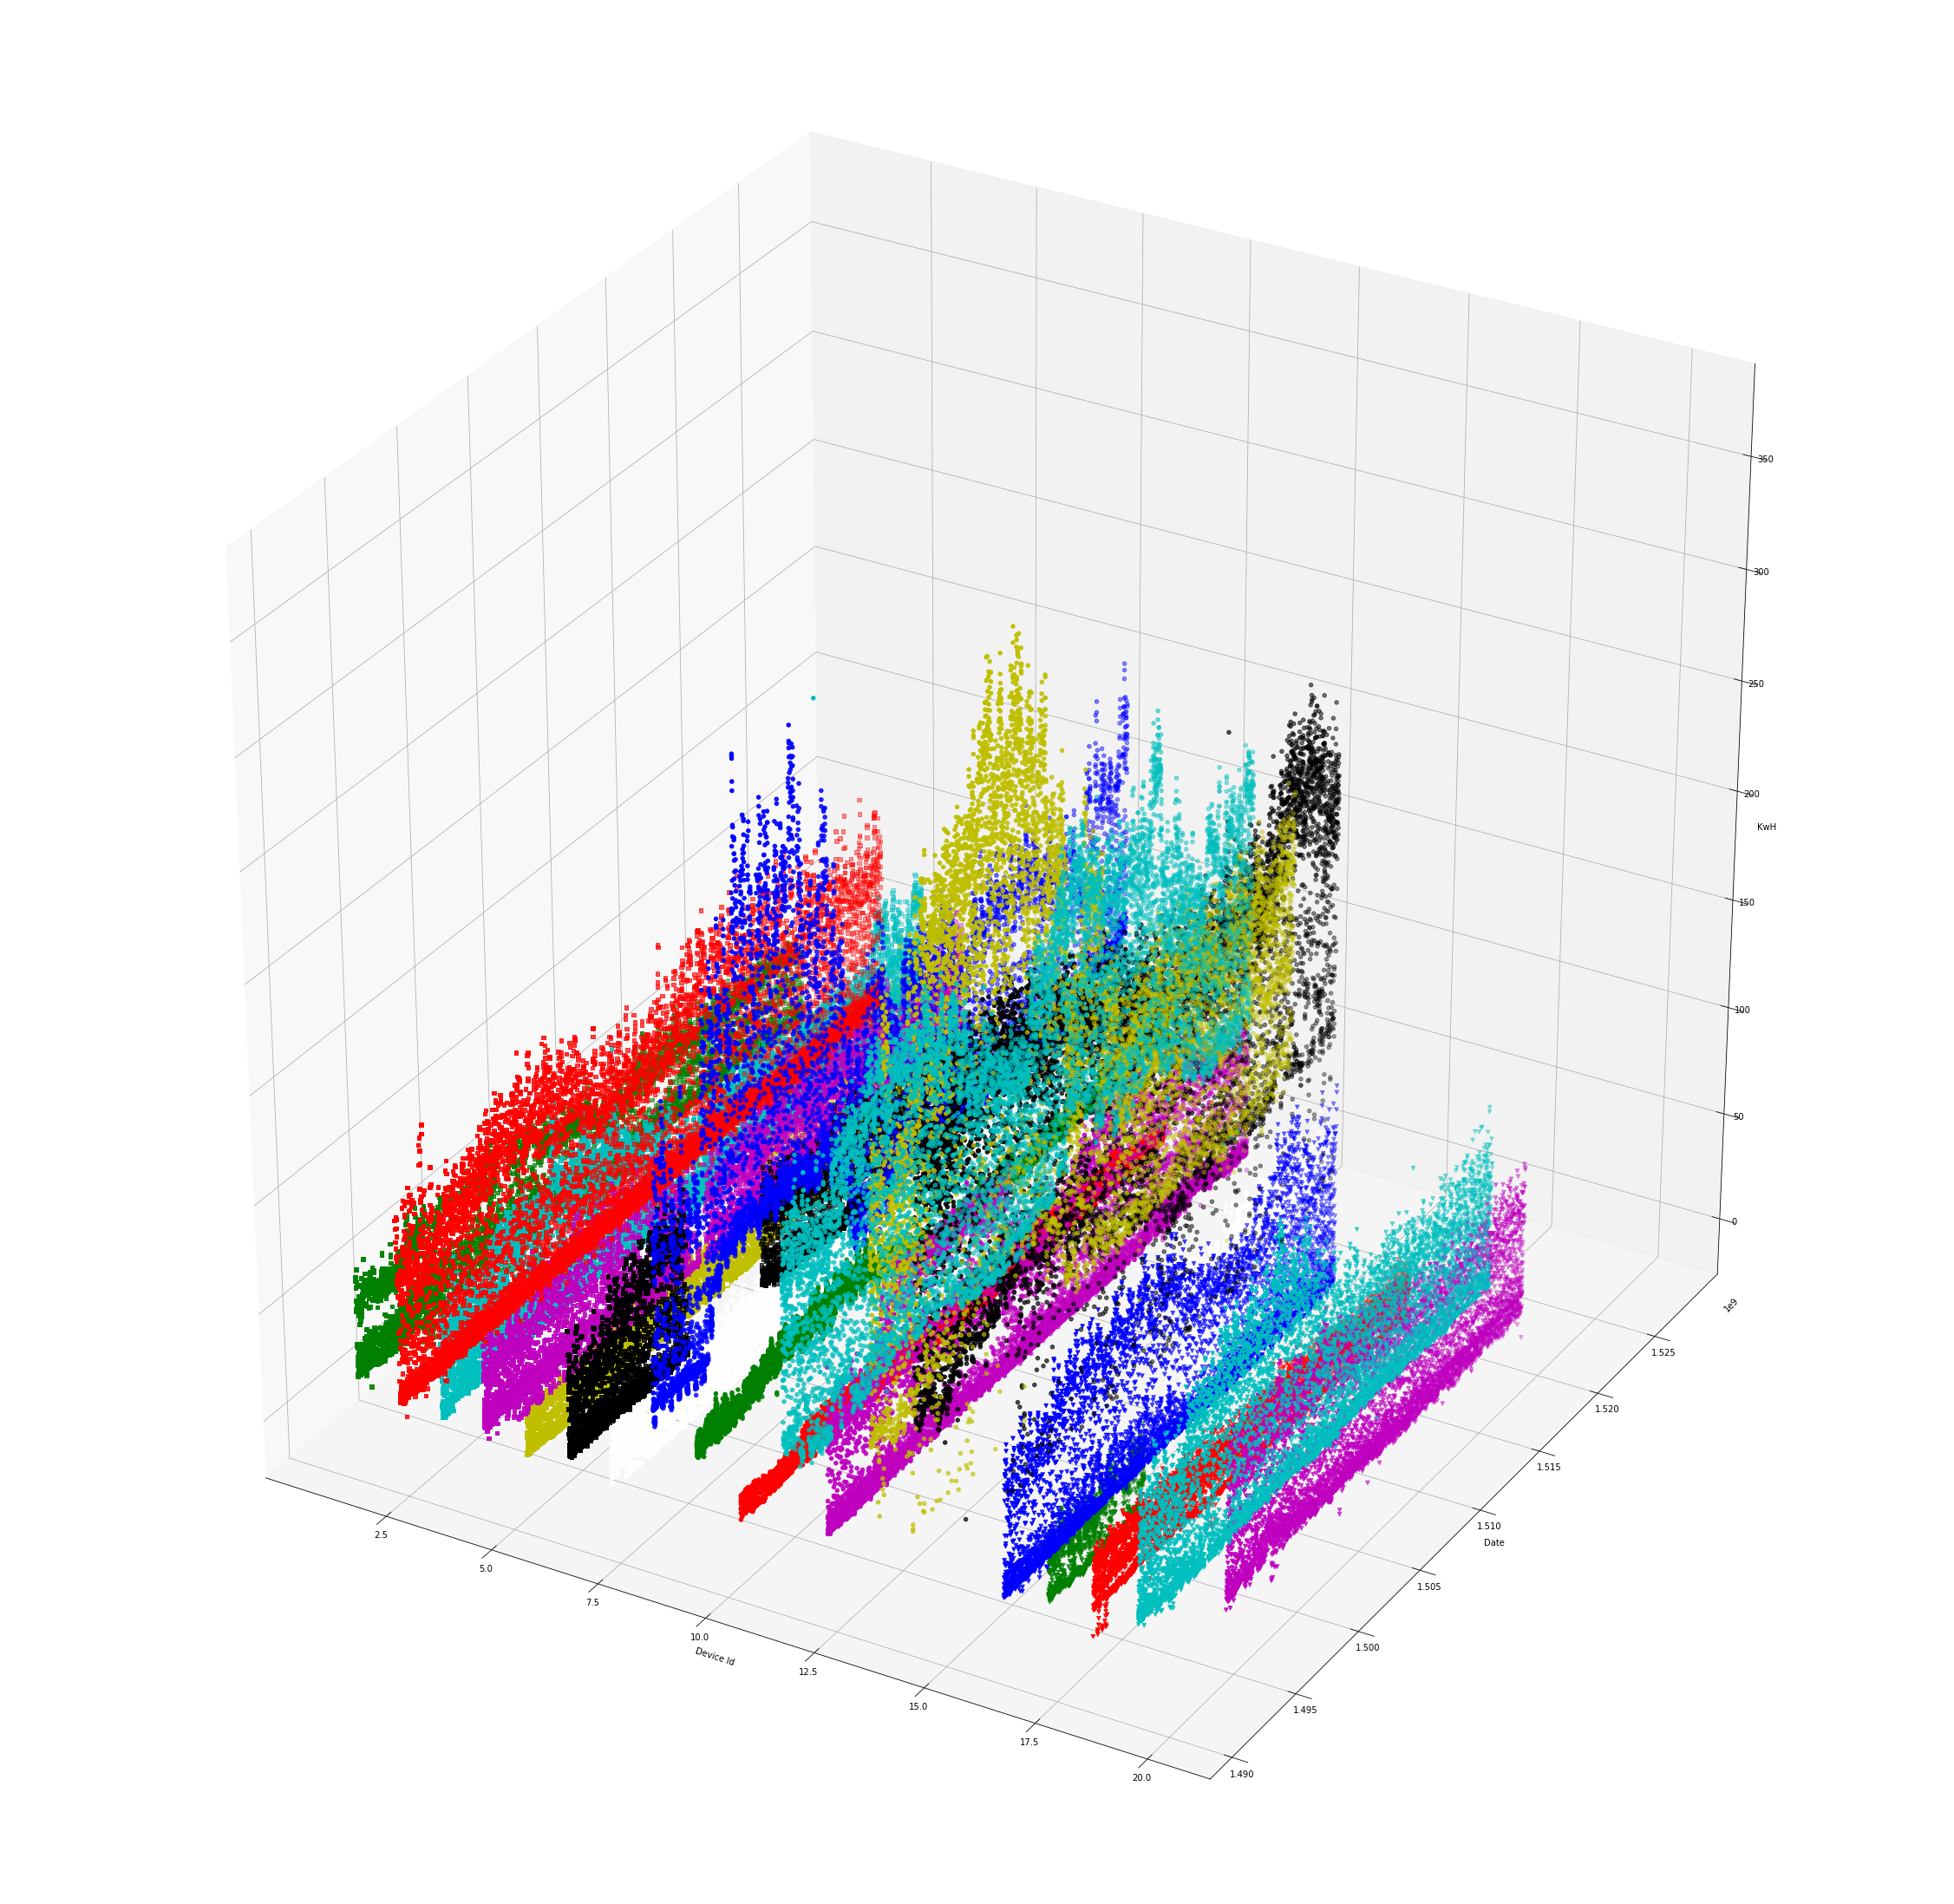

In [11]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import numpy as np, pandas as pd
import datetime as dt


colors = ["b", "g", "r", "c", "m", "y", "k", "w"]
markers = ["s", "o", "v"]

df = pd.read_csv("./kwh.csv")
df.date = pd.to_datetime(df.date)
df.date = (df['date'] - dt.datetime(1970,1,1)).dt.total_seconds()
df['color'] = df.device_id.apply(lambda x : colors[x % 8])
df['marker'] = df.device_id.apply(lambda x : colors[int(x/8)])
print(df.shape, df.columns)

fig = plt.figure(figsize = (40, 40))
ax = fig.add_subplot(111, projection='3d')

device_ids = df['device_id'].unique()
for  x in device_ids:
    ax.scatter(df[df['device_id'] == x]['device_id'], df[df['device_id'] == x]['date'], df[df['device_id'] == x]['metric'], \
                        c = colors[x % 8], marker = markers[int(x/8)])

ax.set_xlabel('Device Id')
ax.set_ylabel('Date')
ax.set_zlabel('KwH')

plt.show()